<a href="https://colab.research.google.com/github/2303a52176/AIML_2303A52176/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy without scaling (k=3): 1.0
Accuracy with scaling (k=3): 1.0


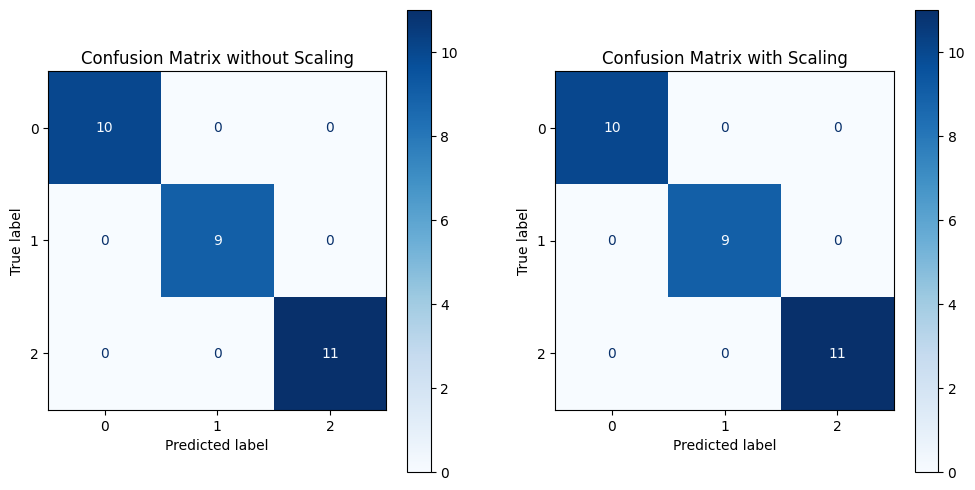

Accuracy without scaling (k=5): 1.0
Accuracy with scaling (k=5): 1.0


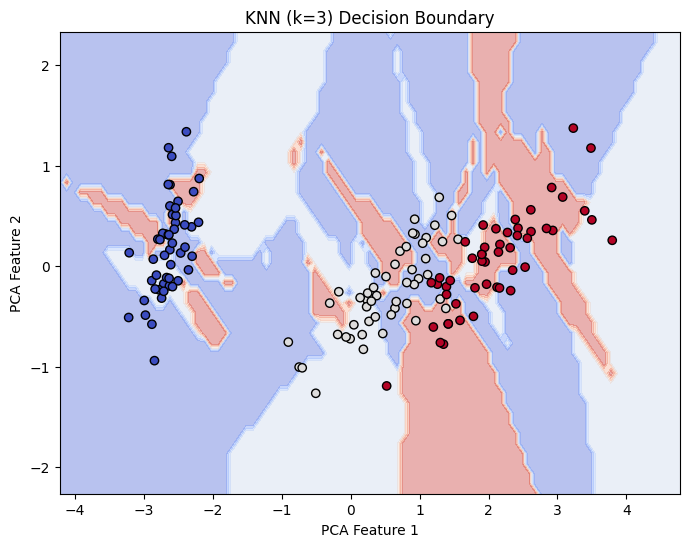

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train KNN and calculate accuracy
def knn_model(X_train, X_test, y_train, y_test, k, scale_features=False):
    if scale_features:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, cm, y_pred

# 3. Evaluate KNN with k=3 and without scaling
accuracy_no_scaling, cm_no_scaling, _ = knn_model(X_train, X_test, y_train, y_test, k=3, scale_features=False)

# 4. Evaluate KNN with k=3 and with feature scaling
accuracy_scaling, cm_scaling, _ = knn_model(X_train, X_test, y_train, y_test, k=3, scale_features=True)

print(f"Accuracy without scaling (k=3): {accuracy_no_scaling}")
print(f"Accuracy with scaling (k=3): {accuracy_scaling}")

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix=cm_no_scaling).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix without Scaling')

ConfusionMatrixDisplay(confusion_matrix=cm_scaling).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix with Scaling')

plt.show()

# 5. Tune the value of k (e.g., k=5) and compare performance
accuracy_k5_no_scaling, cm_k5_no_scaling, _ = knn_model(X_train, X_test, y_train, y_test, k=5, scale_features=False)
accuracy_k5_scaling, cm_k5_scaling, _ = knn_model(X_train, X_test, y_train, y_test, k=5, scale_features=True)

print(f"Accuracy without scaling (k=5): {accuracy_k5_no_scaling}")
print(f"Accuracy with scaling (k=5): {accuracy_k5_scaling}")

# 6. Visualize decision boundaries for KNN with k=3
# We reduce the dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train KNN with k=3 on the 2D reduced data
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_pca[:len(X_train)], y_train)

# Generate a grid of points to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the grid points
Z = knn_k3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("KNN (k=3) Decision Boundary")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

